# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [116]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [117]:

file_path = 'https://raw.githubusercontent.com/whatyuupratama/dataset_retail/refs/heads/main/retail_dataset.csv'
df = pd.read_csv(file_path)
print(df.info())
print(df.head())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21    

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris: 1000, Jumlah kolom: 9
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


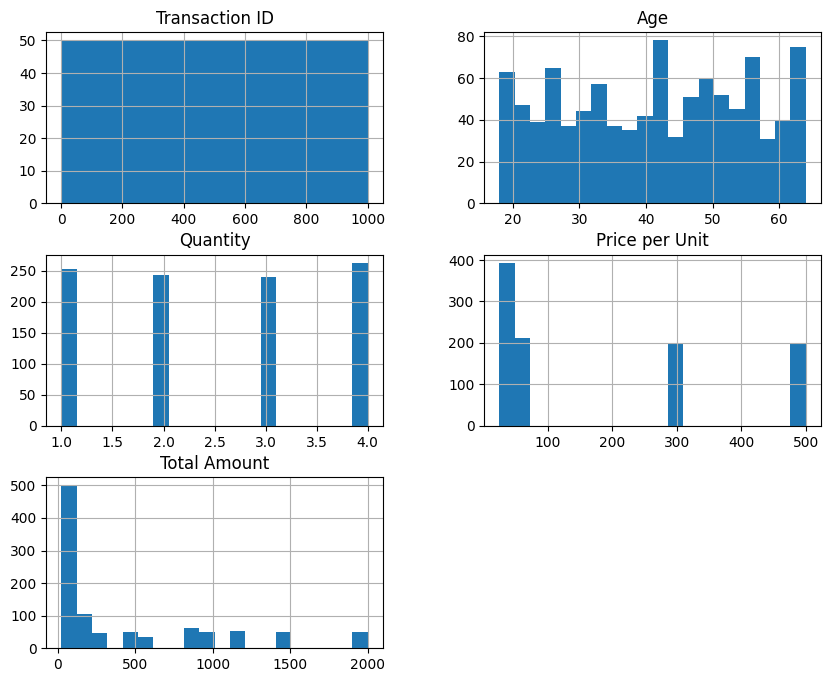

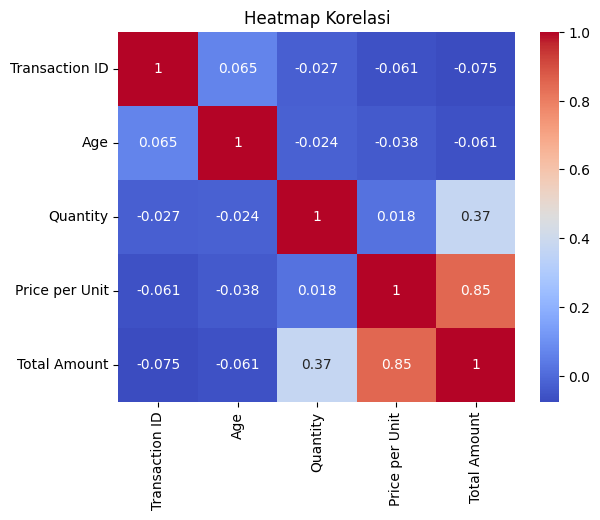

In [118]:

print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")
print(df.isnull().sum())
print(df.describe())

df.hist(bins=20, figsize=(10, 8))
plt.show()

numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [119]:
# Pilih kolom numerik untuk clustering
selected_columns = ['Age', 'Price per Unit', 'Total Amount']
df_selected = df[selected_columns].dropna()

# Normalisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Konversi kembali ke DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=selected_columns)



# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

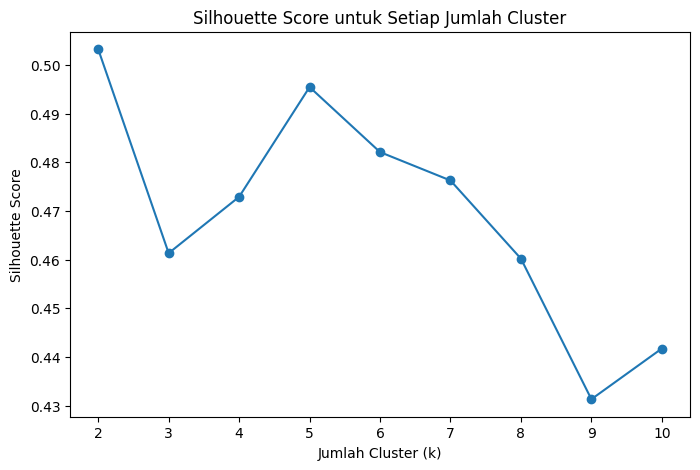

cluster
2    351
1    337
0    312
Name: count, dtype: int64
               Age  Price per Unit  Total Amount
cluster                                         
0        29.307692       57.435897    109.439103
1        40.347181      418.100890   1131.454006
2        53.136752       60.028490    115.541311


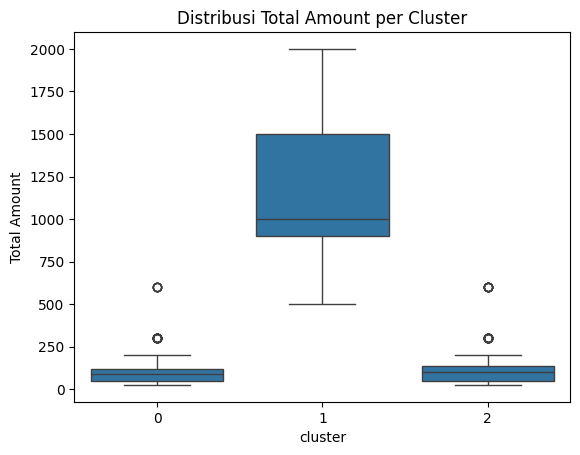

In [120]:
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Setiap Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.show()

k_optimal = 3  # Ganti sesuai hasil plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_

df['cluster'] = labels

print(df['cluster'].value_counts())
print(df.groupby('cluster')[selected_columns].mean())

sns.boxplot(x='cluster', y='Total Amount', data=df)
plt.title('Distribusi Total Amount per Cluster')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

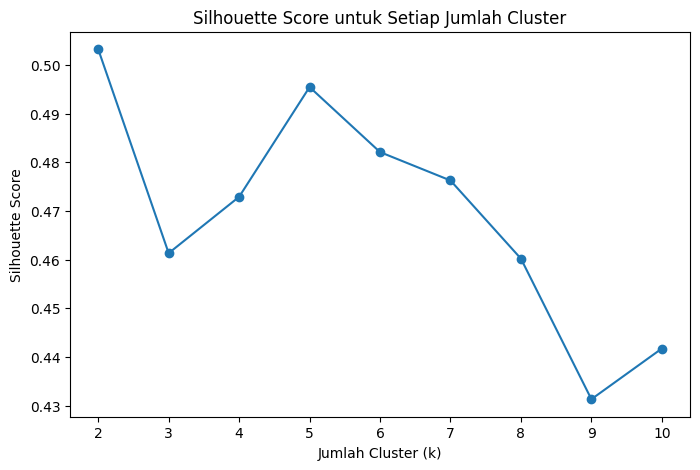

cluster
3    333
0    289
2    198
1    180
Name: count, dtype: int64
               Age  Price per Unit  Total Amount
cluster                                         
0        28.719723       51.955017    101.366782
1        29.261111      421.111111   1217.222222
2        52.308081      390.909091    901.010101
3        52.456456       35.060060     87.702703


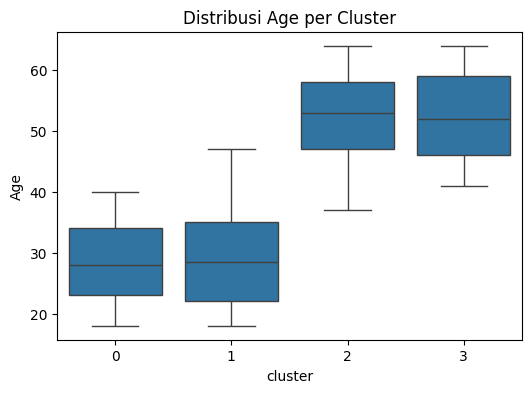

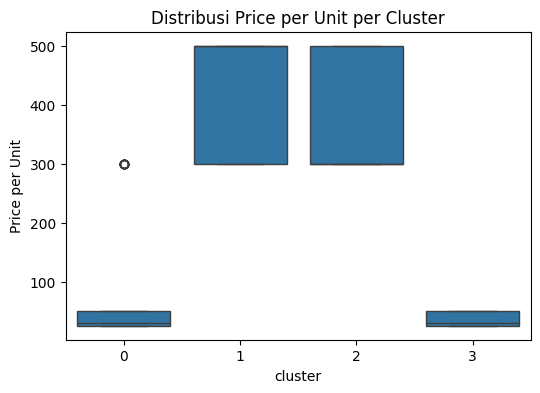

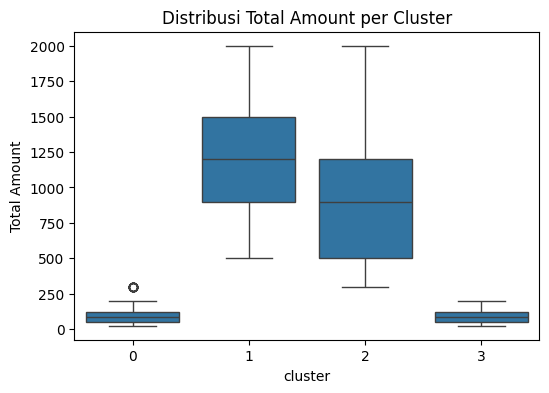

In [121]:
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Setiap Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

df['cluster'] = cluster_labels

df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=selected_columns)
df_inverse['cluster'] = cluster_labels

print(df['cluster'].value_counts())
print(df.groupby('cluster')[selected_columns].mean())

for col in selected_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(f'Distribusi {col} per Cluster')
    plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [122]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

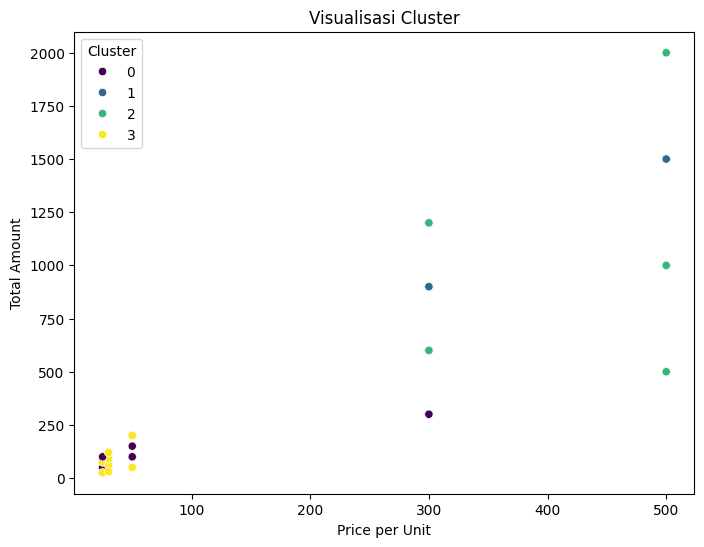

In [123]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price per Unit', y='Total Amount', hue='cluster', palette='viridis')
plt.title('Visualisasi Cluster')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.legend(title='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [124]:
df_inverse = scaler.inverse_transform(df_scaled)
df_inverse = pd.DataFrame(df_inverse, columns=selected_columns)
df_inverse['cluster'] = df['cluster']
print(df_inverse.head())


    Age  Price per Unit  Total Amount  cluster
0  34.0            50.0         150.0        0
1  26.0           500.0        1000.0        1
2  50.0            30.0          30.0        3
3  37.0           500.0         500.0        2
4  30.0            50.0         100.0        0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [125]:
# Gabungkan data yang sudah di-inverse dengan dataset asli
df['Age_original'] = df_inverse['Age']
df['Price_per_Unit_original'] = df_inverse['Price per Unit']
df['Total_Amount_original'] = df_inverse['Total Amount']

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [126]:

cluster_summary = df.groupby('cluster').agg({
    'Age_original': ['mean', 'min', 'max'],
    'Price_per_Unit_original': ['mean', 'min', 'max'],
    'Total_Amount_original': ['mean', 'min', 'max']
}).reset_index()

print(cluster_summary)


  cluster Age_original             Price_per_Unit_original                \
                  mean   min   max                    mean    min    max   
0       0    28.719723  18.0  40.0               51.955017   25.0  300.0   
1       1    29.261111  18.0  47.0              421.111111  300.0  500.0   
2       2    52.308081  37.0  64.0              390.909091  300.0  500.0   
3       3    52.456456  41.0  64.0               35.060060   25.0   50.0   

  Total_Amount_original                 
                   mean    min     max  
0            101.366782   25.0   300.0  
1           1217.222222  500.0  2000.0  
2            901.010101  300.0  2000.0  
3             87.702703   25.0   200.0  


Tulis hasil interpretasinya di sini.
1. Cluster 1: Pelanggan muda dengan daya beli rendah hingga menengah.
2. Cluster 2: Pelanggan lebih tua, stabil secara ekonomi, tetapi tetap hemat.
3. Cluster 3: Pelanggan dengan daya beli tinggi, cenderung membeli barang mahal dan dalam jumlah besar.

# ✨ Analisis Karakteristik Cluster dari Model KMeans

## Cluster 0
- **Rata-rata Usia**: 28.72 tahun  
- **Rata-rata Harga per Unit**: 51.96  
- **Rata-rata Total Pembelian**: 101.37  

**Analisis**:  
Kelompok ini terdiri dari pelanggan muda, dengan rentang usia 18–40 tahun. Mereka lebih sering membeli produk dengan harga rendah hingga menengah. Total pengeluaran mereka juga tergolong kecil, menunjukkan bahwa mereka mungkin masih pelajar, mahasiswa, atau pembeli dengan anggaran terbatas. Kemungkinan besar merupakan pengguna baru atau konsumen yang sensitif terhadap harga.

---

## Cluster 1
- **Rata-rata Usia**: 29.26 tahun  
- **Rata-rata Harga per Unit**: 421.11  
- **Rata-rata Total Pembelian**: 1217.22  

**Analisis**:  
Pelanggan dalam kelompok ini masih tergolong muda, namun mereka memiliki daya beli yang tinggi. Rentang usia mereka adalah 18–47 tahun, dan mereka membeli produk-produk dengan harga premium (300–500 per unit). Jumlah pembelian yang besar menunjukkan kemungkinan mereka adalah profesional muda atau pembeli setia produk luxury dan teknologi tinggi.

---

## Cluster 2
- **Rata-rata Usia**: 52.31 tahun  
- **Rata-rata Harga per Unit**: 390.91  
- **Rata-rata Total Pembelian**: 901.01  

**Analisis**:  
Cluster ini mencerminkan pelanggan usia matang (37–64 tahun) yang melakukan pembelian dengan harga tinggi dan dalam jumlah besar. Meski harga per unit tinggi, jumlah total pembelian sedikit lebih rendah dibandingkan Cluster 1. Ini menunjukkan kebiasaan belanja yang lebih terukur—kemungkinan besar mereka adalah pembeli mapan yang loyal terhadap produk tertentu.

---

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [127]:
df.to_csv('retail_dataset_clustered.csv', index=False)
print("Data saved to 'retail_dataset_clustered.csv'")

Data saved to 'retail_dataset_clustered.csv'
